# Project 5: Sales Predictions Using Basic Models 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('sales_data.csv', encoding='iso-8859-1') 
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], errors='coerce')
df['MonthYear'] = pd.to_datetime(df['MonthYear'])
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   InvoiceNo       99999 non-null  int64         
 1   StockCode       99999 non-null  object        
 2   Description     99999 non-null  object        
 3   Quantity        99999 non-null  int64         
 4   InvoiceDate     48572 non-null  datetime64[ns]
 5   UnitPrice       99999 non-null  float64       
 6   CustomerID      99999 non-null  int64         
 7   Country         99999 non-null  object        
 8   Revenue         99999 non-null  float64       
 9   InvoiceYear     99999 non-null  int64         
 10  InvoiceMonth    99999 non-null  int64         
 11  InvoiceDay      99999 non-null  int64         
 12  InvoiceWeekday  99999 non-null  object        
 13  MonthYear       99999 non-null  datetime64[ns]
dtypes: datetime64[ns](2), float64(2), int64(6), object(4)


## Predict future sales using trends

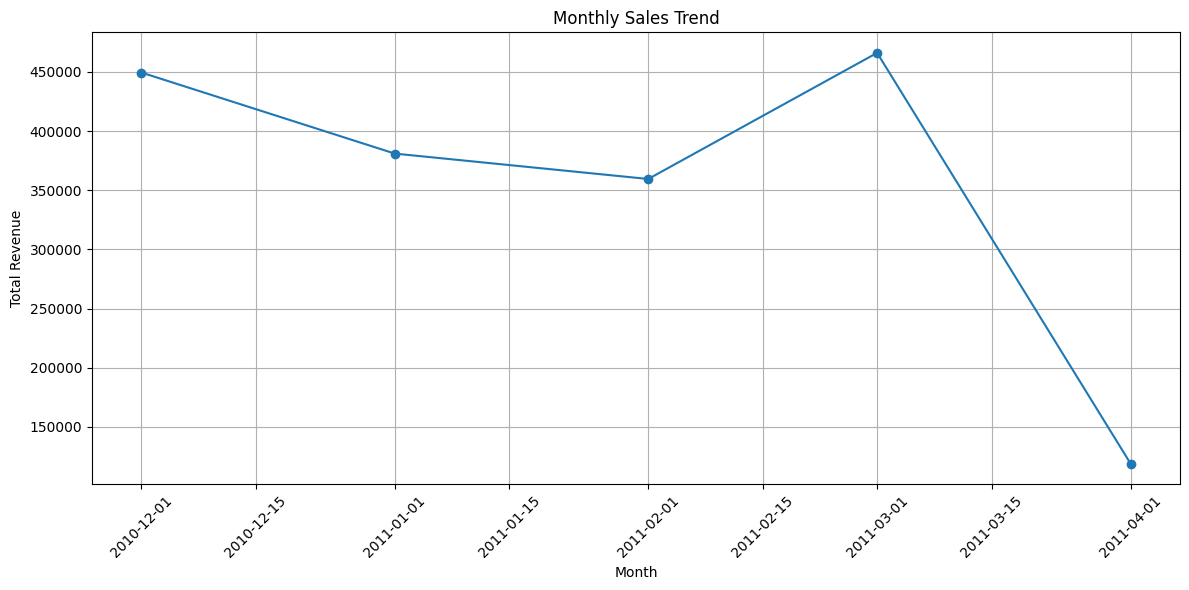

,MonthYear,Revenue
0,2010-12-01,449493.13
1,2011-01-01,380957.54
2,2011-02-01,359498.14
3,2011-03-01,466108.12
4,2011-04-01,118959.48


In [2]:
monthly_sales = df.groupby(df['MonthYear'].dt.to_period('M'))['Revenue'].sum().reset_index()
monthly_sales['MonthYear'] = monthly_sales['MonthYear'].dt.to_timestamp()
plt.figure(figsize=(12, 6))
plt.plot(monthly_sales['MonthYear'], monthly_sales['Revenue'], marker='o', linestyle='-')
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()
plt.show()
monthly_sales.tail()

In [ ]:
train_size = int(len(df) * 0.8)
train, test = df.iloc[:train_size], df.iloc[train_size:]

from statsmodels.tsa.holtwinters import ExponentialSmoothing
model = ExponentialSmoothing(train['Revenue'], seasonal='add', seasonal_periods=12)
model_fit = model.fit()
forecast = model_fit.forecast(len(test))

In [4]:
from sklearn.metrics import mean_squared_error,mean_absolute_percentage_error
import numpy as np
mse = mean_squared_error(test['Revenue'], forecast)
mape = mean_absolute_percentage_error(test['Revenue'], forecast)

print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Percentage Error: {mape}')

Mean Squared Error: 548.2906100690082
Mean Absolute Percentage Error: 1.7204677764404608


## Visualize Actual vs Forecasted Sales

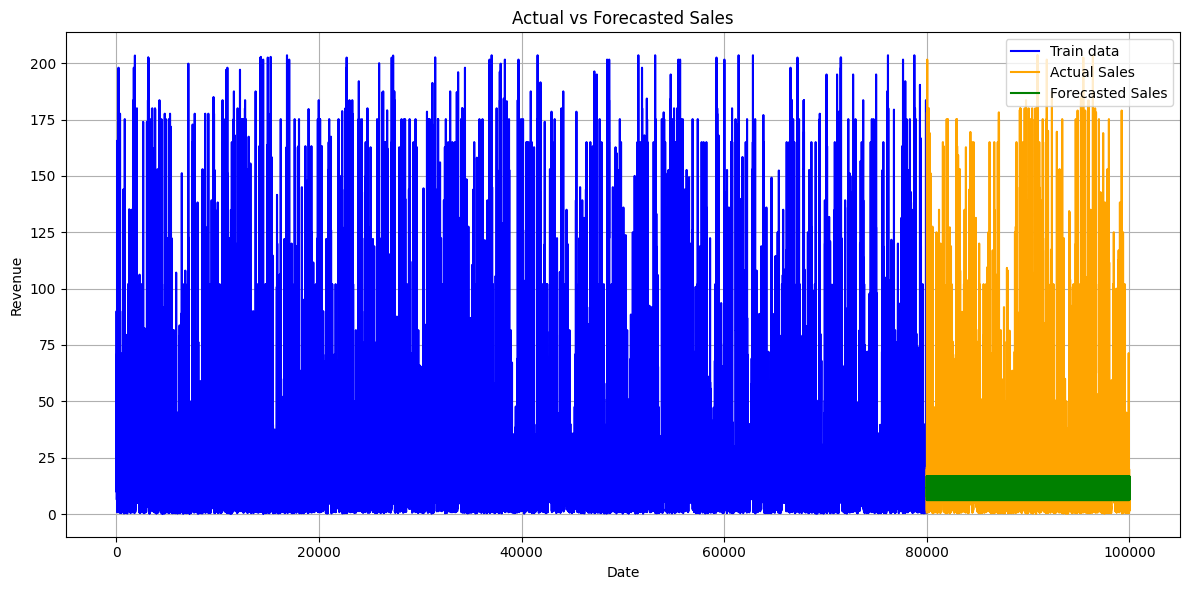

In [7]:
plt.figure(figsize=(12, 6))
plt.plot(train.index, train['Revenue'], label='Train data', color='blue')
plt.plot(test.index, test['Revenue'], label='Actual Sales', color='orange')
plt.plot(test.index, forecast, label='Forecasted Sales', color='green')
plt.title('Actual vs Forecasted Sales')
plt.xlabel('Date')
plt.ylabel('Revenue')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

## Predict Next Month Sales

Predicted Sales for Next Month: 79999     7.889710
80000     8.749498
80001    10.001136
80002    10.844349
80003    11.548241
80004    16.817997
80005    12.848662
80006    11.387072
80007    11.905861
80008    10.491560
80009     6.215826
80010     8.747406
80011     7.889710
80012     8.749498
80013    10.001136
80014    10.844349
80015    11.548241
80016    16.817997
80017    12.848662
80018    11.387072
80019    11.905861
80020    10.491560
80021     6.215826
80022     8.747406
80023     7.889710
80024     8.749498
80025    10.001136
80026    10.844349
80027    11.548241
80028    16.817997
dtype: float64


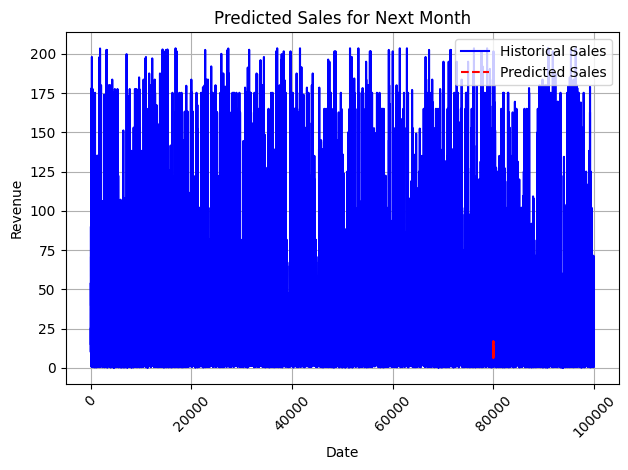

In [13]:
predicted = model_fit.forecast(steps=30)
print(f'Predicted Sales for Next Month: {predicted}')

plt.plot(figsize=(12, 6))
plt.plot(df.index, df['Revenue'], label='Historical Sales', color='blue')
plt.plot(predicted.index, predicted, label='Predicted Sales', color='red', linestyle='--')
plt.title('Predicted Sales for Next Month')
plt.xlabel('Date')
plt.ylabel('Revenue')
plt.legend()
plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()
plt.show()